In [ ]:
import pandas as pd
import requests
import urllib.request
import time
from bs4 import BeautifulSoup

authors=[]
dates=[]
sources=[]
statements=[]
targets=[]

def scrape_website(page_number):
  page_num=str(page_number)

  url="https://www.politifact.com/factchecks/list/?page={}".format(page_num)


  webpage=requests.get(url)
  time.sleep(3)
  soup=BeautifulSoup(webpage.text,'html.parser')

  statement_footer = soup.find_all('footer',attrs = {'class': 'm-statement__footer'})
  statement_quote = soup.find_all('div',attrs = {'class':'m-statement__quote' })
  statement_meta = soup.find_all('div',attrs = {'class':'m-statement__meta'})
  target = soup.find_all('div',attrs= {'class':"m-statement__meter"})

  for i in statement_footer:
    link1=i.text.strip()
    name_and_date=link1.split()
    first_name=name_and_date[1]
    last_name=name_and_date[2]
    full_name=first_name+' '+last_name
    month=name_and_date[4]
    day=name_and_date[5]
    year=name_and_date[6]
    date=month+' '+day+' '+year
    dates.append(date)
    authors.append(full_name)

  for i in statement_quote:
    link2=i.find_all('a')
    statements.append(link2[0].text.strip())

  for i in statement_meta:
    link3=i.find_all('a')
    source_text=link3[0].text.strip()
    sources.append(source_text)

  for i in target:
    fact=i.find('div',attrs={'class':'c-image'}).find('img').get('alt')
    targets.append(fact)

n=200
for i in range(1,n):
  scrape_website(i)


data=pd.DataFrame(columns=['authors','dates','statements','sources','target'])
data['author']=authors
data['sources']=sources
data['date']=dates
data['statement']=statements
data['target']=targets

print(data)
data.to_csv('output1.csv',index=False)

     authors dates statements              sources       target  \
0        NaN   NaN        NaN         TikTok posts        false   
1        NaN   NaN        NaN             JD Vance  barely-true   
2        NaN   NaN        NaN          Viral image        false   
3        NaN   NaN        NaN       Facebook posts        false   
4        NaN   NaN        NaN          Viral image        false   
...      ...   ...        ...                  ...          ...   
5965     NaN   NaN        NaN       Facebook posts    half-true   
5966     NaN   NaN        NaN  Winsome Earle-Sears        false   
5967     NaN   NaN        NaN            Tim Kaine         true   
5968     NaN   NaN        NaN       Facebook posts   pants-fire   
5969     NaN   NaN        NaN       Facebook posts        false   

                author              date  \
0           Sara Swann  January 17, 2025   
1     Caleb McCullough  January 17, 2025   
2       Ciara O'Rourke  January 17, 2025   
3       Ciara O'Rou

In [ ]:
import pandas as pd
df=pd.read_csv("/content/output1 (1).csv")
df

,sources,target,author,date,statement
0,TikTok posts,0,Sara Swann,"January 17, 2025",President-elect Donald Trump posted on X that ...
1,JD Vance,1,Caleb McCullough,"January 17, 2025",“Some of these (California) reservoirs have be...
2,Viral image,0,Ciara O'Rourke,"January 17, 2025",“All three California wild fires seem to start...
3,Facebook posts,0,Ciara O'Rourke,"January 17, 2025",“Jimmy Kimmel just announced that his show wil...
4,Viral image,0,Ciara O'Rourke,"January 17, 2025",Video shows Mexican firefighters going to help...
...,...,...,...,...,...
5965,Facebook posts,1,Tom Kertscher,"May 27, 2021","Lumber, gas, wheat, coal and corn cost more in..."
5966,Winsome Earle-Sears,0,Warren Fiske,"May 27, 2021",“The very first Republican convention after th...
5967,Tim Kaine,1,Jon Greenberg,"May 27, 2021","“New Haven, Conn., had to issue bonds for a br..."
5968,Facebook posts,0,Amy Sherman,"May 27, 2021",“Boom! Georgia 1st to decertify election.”


In [ ]:
pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 10.2 MB/s eta 0:00:00


In [ ]:
#DATA PREPROCESSING
import pandas as pd
import nltk
import contractions
import re
def preprocess_text(text):
  text=text.lower()
  text=text.replace('-',' ')
  text=contractions.fix(text)
  text=re.sub(r"\$,*?\$"," ",text)
  text=re.sub(r"[^a-zA-Z0-9\s]"," ",text)
  text=re.sub(r"\d+"," ",text)
  text=re.sub(r"\s+"," ",text).strip()
  return text

df['processed_statement']=df['statement'].apply(preprocess_text)
print(df[['statement','processed_statement']])
df.to_csv('output2.csv',index=False)

                                              statement  \
0     President-elect Donald Trump posted on X that ...   
1     “Some of these (California) reservoirs have be...   
2     “All three California wild fires seem to start...   
3     “Jimmy Kimmel just announced that his show wil...   
4     Video shows Mexican firefighters going to help...   
...                                                 ...   
5965  Lumber, gas, wheat, coal and corn cost more in...   
5966  “The very first Republican convention after th...   
5967  “New Haven, Conn., had to issue bonds for a br...   
5968         “Boom! Georgia 1st to decertify election.”   
5969  Says a photo shows a “lithium mine for hybrid ...   

                                    processed_statement  
0     president elect donald trump posted on x that ...  
1     some of these california reservoirs have been ...  
2     all three california wild fires seem to start ...  
3     jimmy kimmel just announced that his show will...  
4

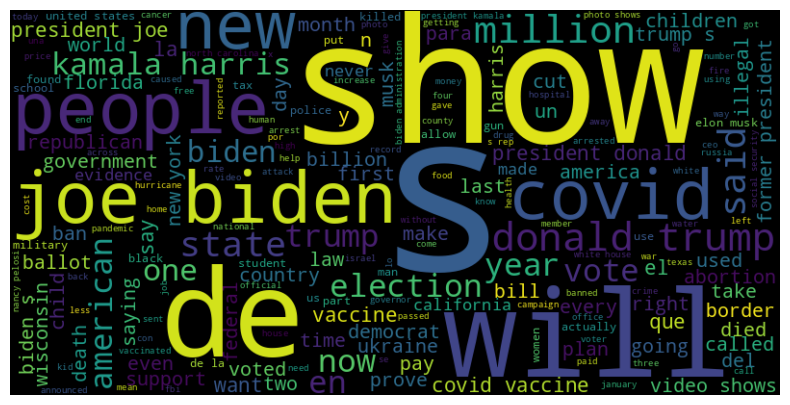

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text="".join(review for review in df['processed_statement'])
wordcloud=WordCloud(width=800,height=400,background_color="black",colormap="viridis").generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
tokens=df['processed_statement'].apply(word_tokenize)
print(tokens)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


0       [president, elect, donald, trump, posted, on, ...
1       [some, of, these, california, reservoirs, have...
2       [all, three, california, wild, fires, seem, to...
3       [jimmy, kimmel, just, announced, that, his, sh...
4       [video, shows, mexican, firefighters, going, t...
                              ...                        
5965    [lumber, gas, wheat, coal, and, corn, cost, mo...
5966    [the, very, first, republican, convention, aft...
5967    [new, haven, conn, had, to, issue, bonds, for,...
5968         [boom, georgia, st, to, decertify, election]
5969    [says, a, photo, shows, a, lithium, mine, for,...
Name: processed_statement, Length: 5970, dtype: object


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
vectoriser=CountVectorizer()
vectors=vectoriser.fit_transform(df['processed_statement'])
transformer=TfidfTransformer()
tfidf_data=transformer.fit_transform(vectors)
print(vectoriser.get_feature_names_out())
print(tfidf_data.toarray())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X=tfidf_data.toarray()
Y=df['target']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
acc=accuracy_score(Y_pred,Y_test)
pre=precision_score(Y_pred,Y_test,average='weighted')
rec=recall_score(Y_pred,Y_test,average='weighted')
cm=confusion_matrix(Y_pred,Y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake News', 'True News'])
disp.plot(cmap=plt.cm.Blues)
plt.show()
print(acc)
print(pre)
print(rec)
print(cm)

In [ ]:
X=tfidf_data.toarray()
Y=df['target']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
model=DecisionTreeClassifier(max_depth=3,random_state=42)
model.fit(X_train,Y_train)
plt.figure(figsize=(10,7))
plot_tree(model,feature_names=[str(i) for i in range(X.shape[1])],class_names=[str(cls) for cls in Y.unique()],filled=True)
plt.show()

In [ ]:
X=tfidf_data.toarray()
Y=df['target']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
lr=LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
acc=accuracy_score(Y_pred,Y_test)
pre=precision_score(Y_pred,Y_test,average='weighted')
rec=recall_score(Y_pred,Y_test,average='weighted')
cm=confusion_matrix(Y_pred,Y_test)
cm=confusion_matrix(Y_pred,Y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake News', 'True News'])
disp.plot(cmap=plt.cm.Purples)
plt.show()
print(acc)
print(pre)
print(rec)
print(cm)

In [ ]:
fpr,tpr,_=roc_curve(Y_test,model.predict_proba(X_test)[:,1])
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label=f'AUC = {roc_auc}')
plt.show()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [ ]:
from sklearn.metrics import precision_recall_curve
precision,recall,_=precision_recall_curve(Y_test,model.predict_proba(X_test)[:,1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot(recall,precision)
plt.show()

In [ ]:
X=tfidf_data.toarray()
Y=df['target']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
rf=RandomForestClassifier(class_weight='balanced')
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)
acc=accuracy_score(Y_pred,Y_test)
pre=precision_score(Y_pred,Y_test,average='weighted')
rec=recall_score(Y_pred,Y_test,average='weighted')
print(acc)
print(pre)
print(rec)
cm=confusion_matrix(Y_pred,Y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake News', 'True News'])
disp.plot(cmap=plt.cm.Reds)
plt.show()
print(cm)

In [ ]:
import xgboost as xgb
xgbmodel=xgb.XGBClassifier()
xgbmodel.fit(X_train,Y_train)
Y_pred=xgbmodel.predict(X_test)
acc=accuracy_score(Y_pred,Y_test)
pre=precision_score(Y_pred,Y_test,average='weighted')
rec=recall_score(Y_pred,Y_test,average='weighted')
print(acc)
print(pre)
print(rec)
cm=confusion_matrix(Y_pred,Y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake News', 'True News'])
disp.plot(cmap=plt.cm.Greens)
plt.show()
print(cm)
plot_tree(xgbmodel,num_trees=0)
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(X_train,Y_train)
Y_pred=mnb.predict(X_test)
acc=accuracy_score(Y_pred,Y_test)
pre=precision_score(Y_pred,Y_test,average='weighted')
rec=recall_score(Y_pred,Y_test,average='weighted')
print(acc)
print(pre)
print(rec)
cm=confusion_matrix(Y_pred,Y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake News', 'True News'])
disp.plot(cmap=plt.cm.PuRd)
plt.show()
print(cm)
probs=mnb.predict_proba(X_test)
plt.hist(probs[:,1])
plt.xlabel("Predicted Probablity")
plt.ylabel("Frequency")#spread out model which is good

In [ ]:
from sklearn.ensemble import VotingClassifier
model1=LogisticRegression()
model2=RandomForestClassifier()
voting_model=VotingClassifier(estimators=[('lr',model1),('rf',model2)],voting='soft')
voting_model.fit(X_train,Y_train)
Y_pred=voting_model.predict(X_test)
acc=accuracy_score(Y_pred,Y_test)
pre=precision_score(Y_pred,Y_test,average='weighted')
rec=recall_score(Y_pred,Y_test,average='weighted')
print(acc)
print(pre)
print(rec)
cm=confusion_matrix(Y_pred,Y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake News', 'True News'])
disp.plot(cmap=plt.cm.BuPu)
plt.show()
print(cm)

In [ ]:
from sklearn.ensemble import StackingClassifier
model1=LogisticRegression()
model2=RandomForestClassifier(class_weight='balanced')
sc=StackingClassifier(estimators=[('lr',model1),('rf',model2)],final_estimator=LogisticRegression())
sc.fit(X_train,Y_train)
Y_pred=sc.predict(X_test)
acc=accuracy_score(Y_pred,Y_test)
print(acc)
print(pre)
print(rec)
cm=confusion_matrix(Y_pred,Y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake News', 'True News'])
disp.plot(cmap=plt.cm.GnBu)
plt.show()
print(cm)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense,LSTM,Dropout

X=tfidf_data.toarray()
Y=df['target']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

model=Sequential([
    Embedding(input_dim=10000,output_dim=128),
    LSTM(64,return_sequences=False),
    Dropout(0.5),
    Dense(32,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,Y_train,epochs=3,batch_size=32,validation_split=0.2)

loss,accuracy=model.evaluate(X_test,Y_test)
print(loss)
print(accuracy)

predictions=model.predict(X_test)
predictions=(predictions>0.5).astype(int)
